# Initial Model

This notebook can be used for training the first intial models. 

In [1]:
import os
import os.path
import numpy as np
import glob
import matplotlib.pyplot as plt
import preprocessing_functions as pre
import training_functions as training
import skimage.io
import prediction as pred
import keras


Using TensorFlow backend.


### Image preprocessing
Load the images used for training and validation. Specify if you want to train on d1 or d2 output.

Input and Output Images are stacked seperatly. 

Images are normalized using Batch-normalization with mean and std: 
$$ im\_norm = \frac{im - mean}{std} $$


In [2]:
# load images for one-channel output
images = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\16bitImages\*d0.png") # define imagefolder
X_stack = pre.stack_images(images)
images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\16bitImages\*d1.png")
Y_stack= pre.stack_images(images)

More than 2 channels not implemeted
More than 2 channels not implemeted


Load images for model predicts 2 output channels

In [2]:
# load all images
images = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\16bitImages\*d0.png") # define imagefolder
X_stack = pre.stack_images(images, num_channels = 1)
images2 = glob.glob(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\16bitImages\*.png")
images =  [x for x in images2 if x not in images] #images2.remove(images)# define imagefolder
Y_stack= pre.stack_images(images, num_channels = 2)

In [3]:
# normalize images
(x_norm, mean, std) = pre.norm_batch(X_stack)
y_norm = pre.norm(Y_stack, mean, std)

In [6]:
# define images for training (change to automated later)
X_train = x_norm[0:40]
Y_train = y_norm[0:40]
X_val = x_norm[40:53]
Y_val = y_norm[40:53]

### Network training
The final network will be saved as specified in the last argument of the function. The image-input to the network should have the shape (num of images, dim1, dim2, num_channels).

In [7]:
# train UNet
history = training.train(X_train, Y_train, X_val, Y_val, 'mdl_d1d2')


Input (None, 128, 128, 1)
1. Conv (None, 64, 64, 64)
2. conv (None, 64, 64, 128)
3. conv (None, 32, 32, 256)
4. conv (None, 16, 16, 512)
1. UpConv (None, 32, 32, 768)
2. UpConv (None, 64, 64, 384)
3. UpConv (None, 128, 128, 192)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 128, 128, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 128, 128, 64) 256         conv2d_15[0][0]                  
_____________________________________________________________

10/10 [==============================] - 41s 4s/step - loss: 1.1812 - mse: 1.1812 - mae: 0.7852 - val_loss: 0.7576 - val_mse: 0.7576 - val_mae: 0.5128
Epoch 2/15
10/10 [==============================] - 39s 4s/step - loss: 0.5516 - mse: 0.5516 - mae: 0.5462 - val_loss: 0.6280 - val_mse: 0.6280 - val_mae: 0.4851
Epoch 3/15
10/10 [==============================] - 39s 4s/step - loss: 0.6745 - mse: 0.6745 - mae: 0.5541 - val_loss: 0.4981 - val_mse: 0.4981 - val_mae: 0.4920
Epoch 4/15
10/10 [==============================] - 39s 4s/step - loss: 0.4722 - mse: 0.4722 - mae: 0.4826 - val_loss: 0.4844 - val_mse: 0.4844 - val_mae: 0.5355
Epoch 5/15
10/10 [==============================] - 37s 4s/step - loss: 0.6096 - mse: 0.6096 - mae: 0.5379 - val_loss: 0.6503 - val_mse: 0.6503 - val_mae: 0.5896
Epoch 6/15
10/10 [==============================] - 36s 4s/step - loss: 0.4893 - mse: 0.4893 - mae: 0.5168 - val_loss: 0.5457 - val_mse: 0.5457 - val_mae: 0.5996
Epoch 7/15
10/10 [=====================

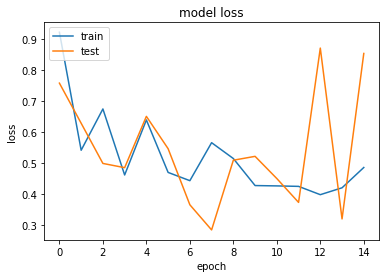

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Image prediction




In [11]:
out = []
model = keras.models.load_model('mdl_d1d2')
for n in range(5):
    image = X_val[n]

    output = pred.predict(model, image, 128, 128, num_outputs=2)
    #output_norm = pre.unnormalize(output, mean, std)
    out.append(output)
out = np.stack(out, axis = 0)

(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)
(144, 128, 128, 2)


In [16]:
im = out[0,:,:,1]
skimage.io.imsave(r"C:\Users\tsche\Desktop\Master\2. Semester\Project Staining\pred_im\d1d2_testd2.png", im)

Lossy conversion from float64 to uint8. Range [0.0, 1.995462417602539]. Convert image to uint8 prior to saving to suppress this warning.


In [14]:
out.shape

(5, 1104, 1104, 2)

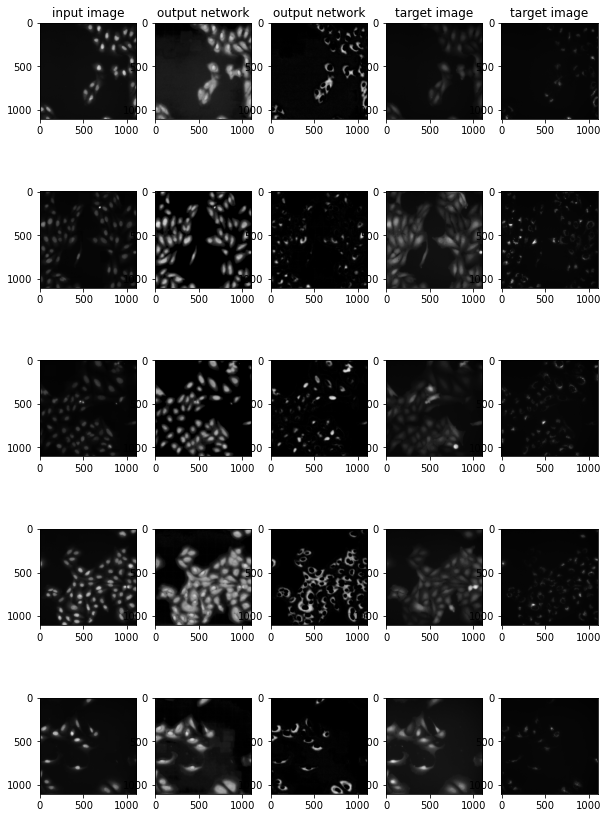

In [18]:
plt.figure(figsize=(10,15)) 

for p in range(5):
    plt.subplot(5,5,1+5*p)    
    plt.imshow(X_val[p], cmap='gray')
    if p == 0:
        plt.title('input image')

    plt.subplot(5,5,2+5*p)    
    plt.imshow(out[p,:,:,0], cmap='gray')
    if p == 0:
        plt.title('output network')
    
    plt.subplot(5,5,3+5*p)    
    plt.imshow(out[p,:,:,1], cmap='gray')
    if p == 0:
        plt.title('output network')

    plt.subplot(5,5,4+5*p) 
    plt.imshow(Y_val[p,:,:,0], cmap='gray')
    if p == 0:
        plt.title('target image')
        
    
    plt.subplot(5,5,5+5*p) 
    plt.imshow(Y_val[p,:,:,1], cmap='gray')
    if p == 0:
        plt.title('target image')
    
    

plt.show()

